In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


# Model Building

In [5]:
import statsmodels.formula.api as smf

In [6]:
model = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [7]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [8]:
model.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

# Linear Regression

In [10]:
#Wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.pvalues

Intercept    5.053995e-02
WT           1.914892e-13
HP           7.560276e-07
SP           1.089096e-02
dtype: float64

In [11]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.pvalues

Intercept    4.194554e-02
VOL          1.648229e-13
SP           1.207855e-02
HP           8.644870e-07
dtype: float64

# Calculate VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [15]:
data = df.drop(columns=['MPG'])
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


# List comprehension

In [17]:
lst = []

for i in range(1,11):
    lst.append(i**2)

In [18]:
type(lst)
lst

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [19]:
[i**2 for i in range(1,11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [20]:
lst_com = [i**2 for i in range(1,10)]
print(type(lst_com))
lst_com

<class 'list'>


[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [21]:
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [22]:
variance_inflation_factor(data,2)

50.541968227925125

In [23]:
vif = pd.DataFrame()
vif

""


In [24]:
data.columns

Index(['HP', 'VOL', 'SP', 'WT'], dtype='object')

In [25]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [26]:
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [27]:
variance_inflation_factor(data,1)

12708.789368875166

In [28]:
[variance_inflation_factor(data,i) for i in range(0,4)]

[11.19129601632287, 12708.789368875166, 50.541968227925125, 12172.827328054147]

In [29]:
vif['VIF'] = [variance_inflation_factor(data,i) for i in range(0,4)]

In [30]:
vif

,Features,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


# Subset Selection

In [32]:
#wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared

0.769482813998346

In [33]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.rsquared

0.770368341321302

# MODEL VALIDATION TECHNIQUES

# 1.Residual Analysis


**As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.**

**NORMALITY TEST**

In [36]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [37]:
vol.params

Intercept    29.923389
VOL          -0.201651
SP            0.400659
HP           -0.206705
dtype: float64

In [38]:
model = smf.ols('MPG~HP+VOL+SP', data=df).fit()
model.rsquared

0.770368341321302

In [39]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [40]:
model.fittedvalues

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [41]:
model.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

<Axes: ylabel='Count'>

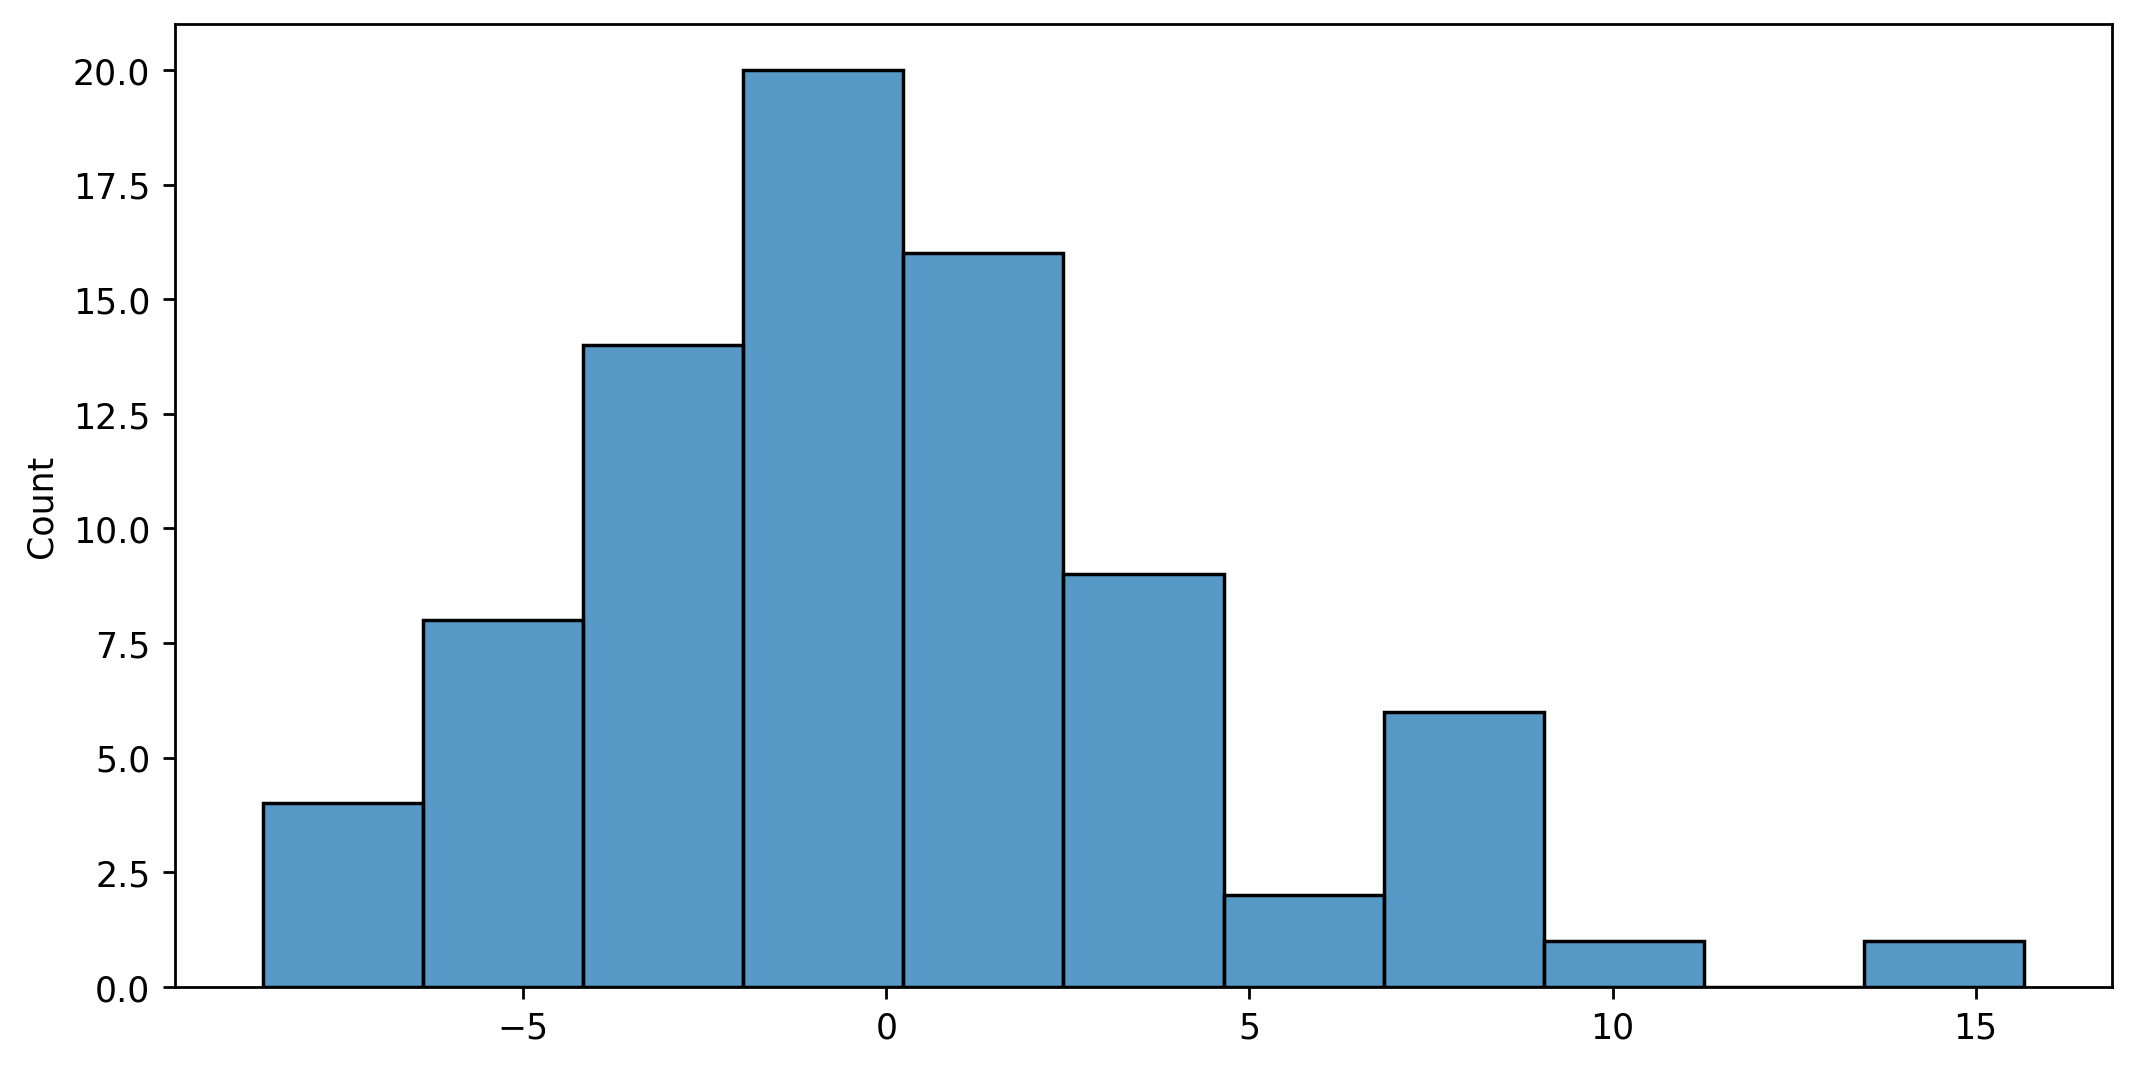

In [42]:
sns.histplot(model.resid)

In [43]:
sns.set_theme(style='darkgrid', palette='viridis')

<Axes: ylabel='Count'>

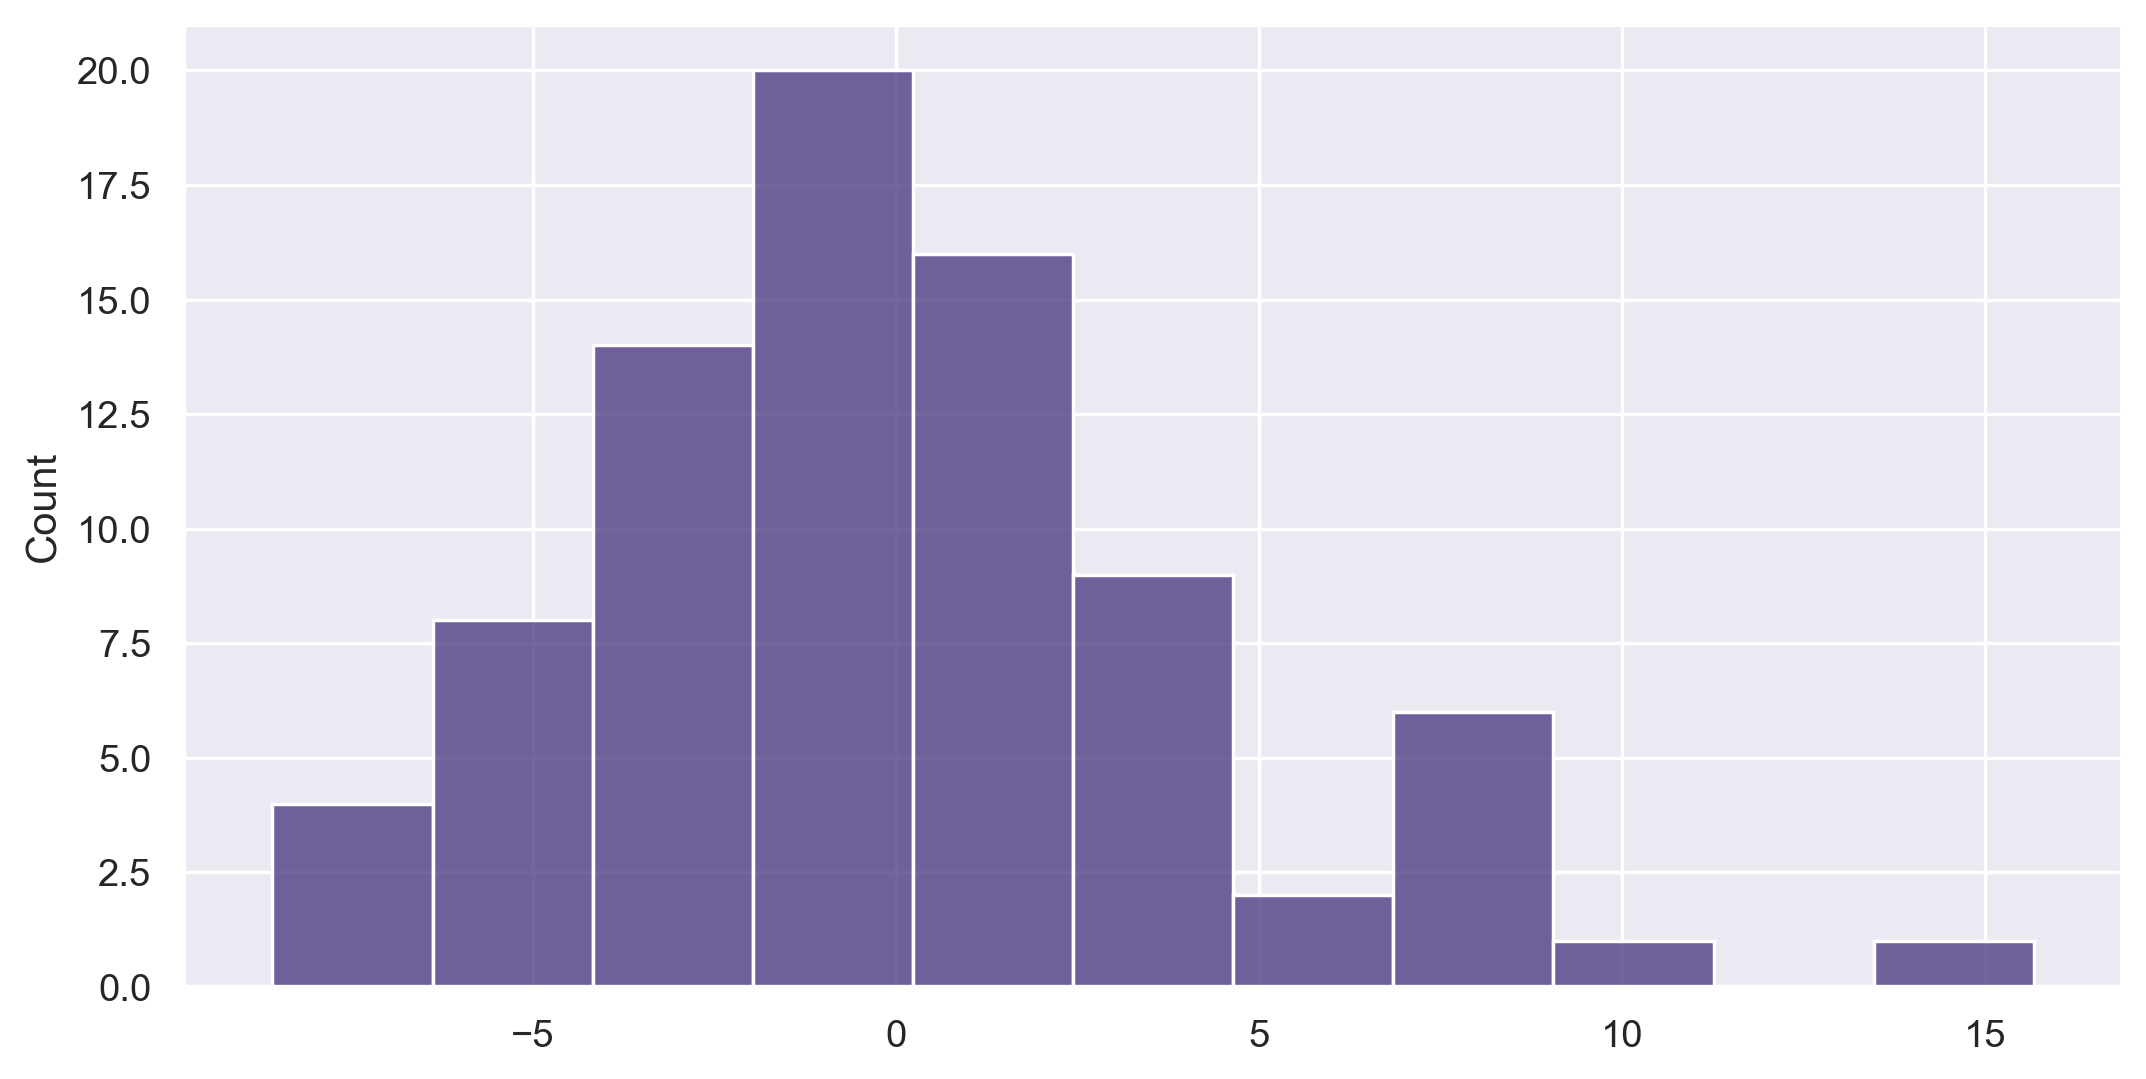

In [44]:
sns.histplot(model.resid)

# 2. Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [46]:
model.fittedvalues   #predicted values

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [47]:
model.resid      #errors

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

Text(0.5, 1.0, 'Constant Variance')

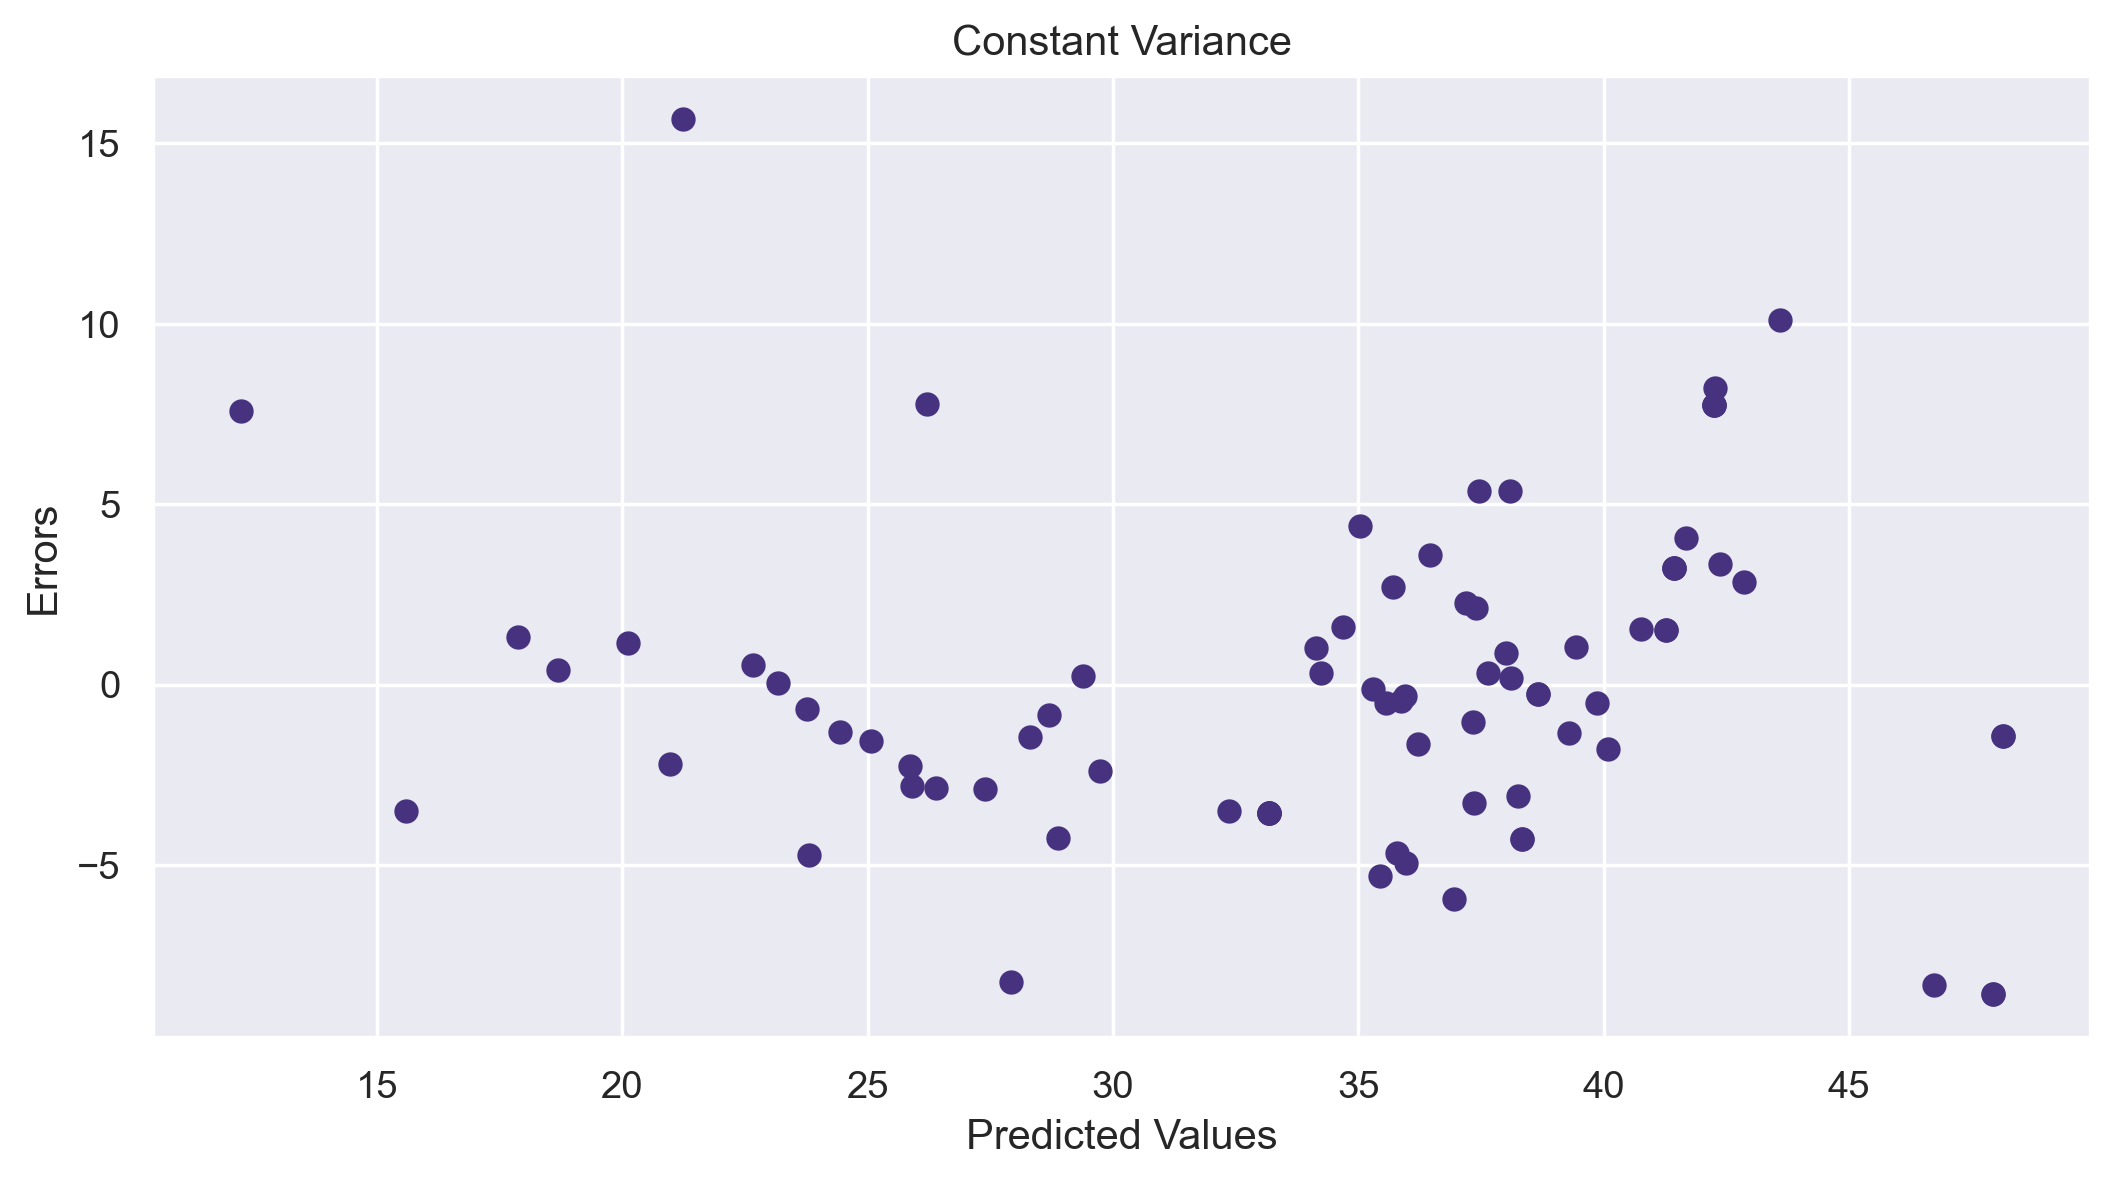

In [48]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Constant Variance')

# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [51]:
model

In [52]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [53]:
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

Text(0, 0.5, 'Cooks Distance')

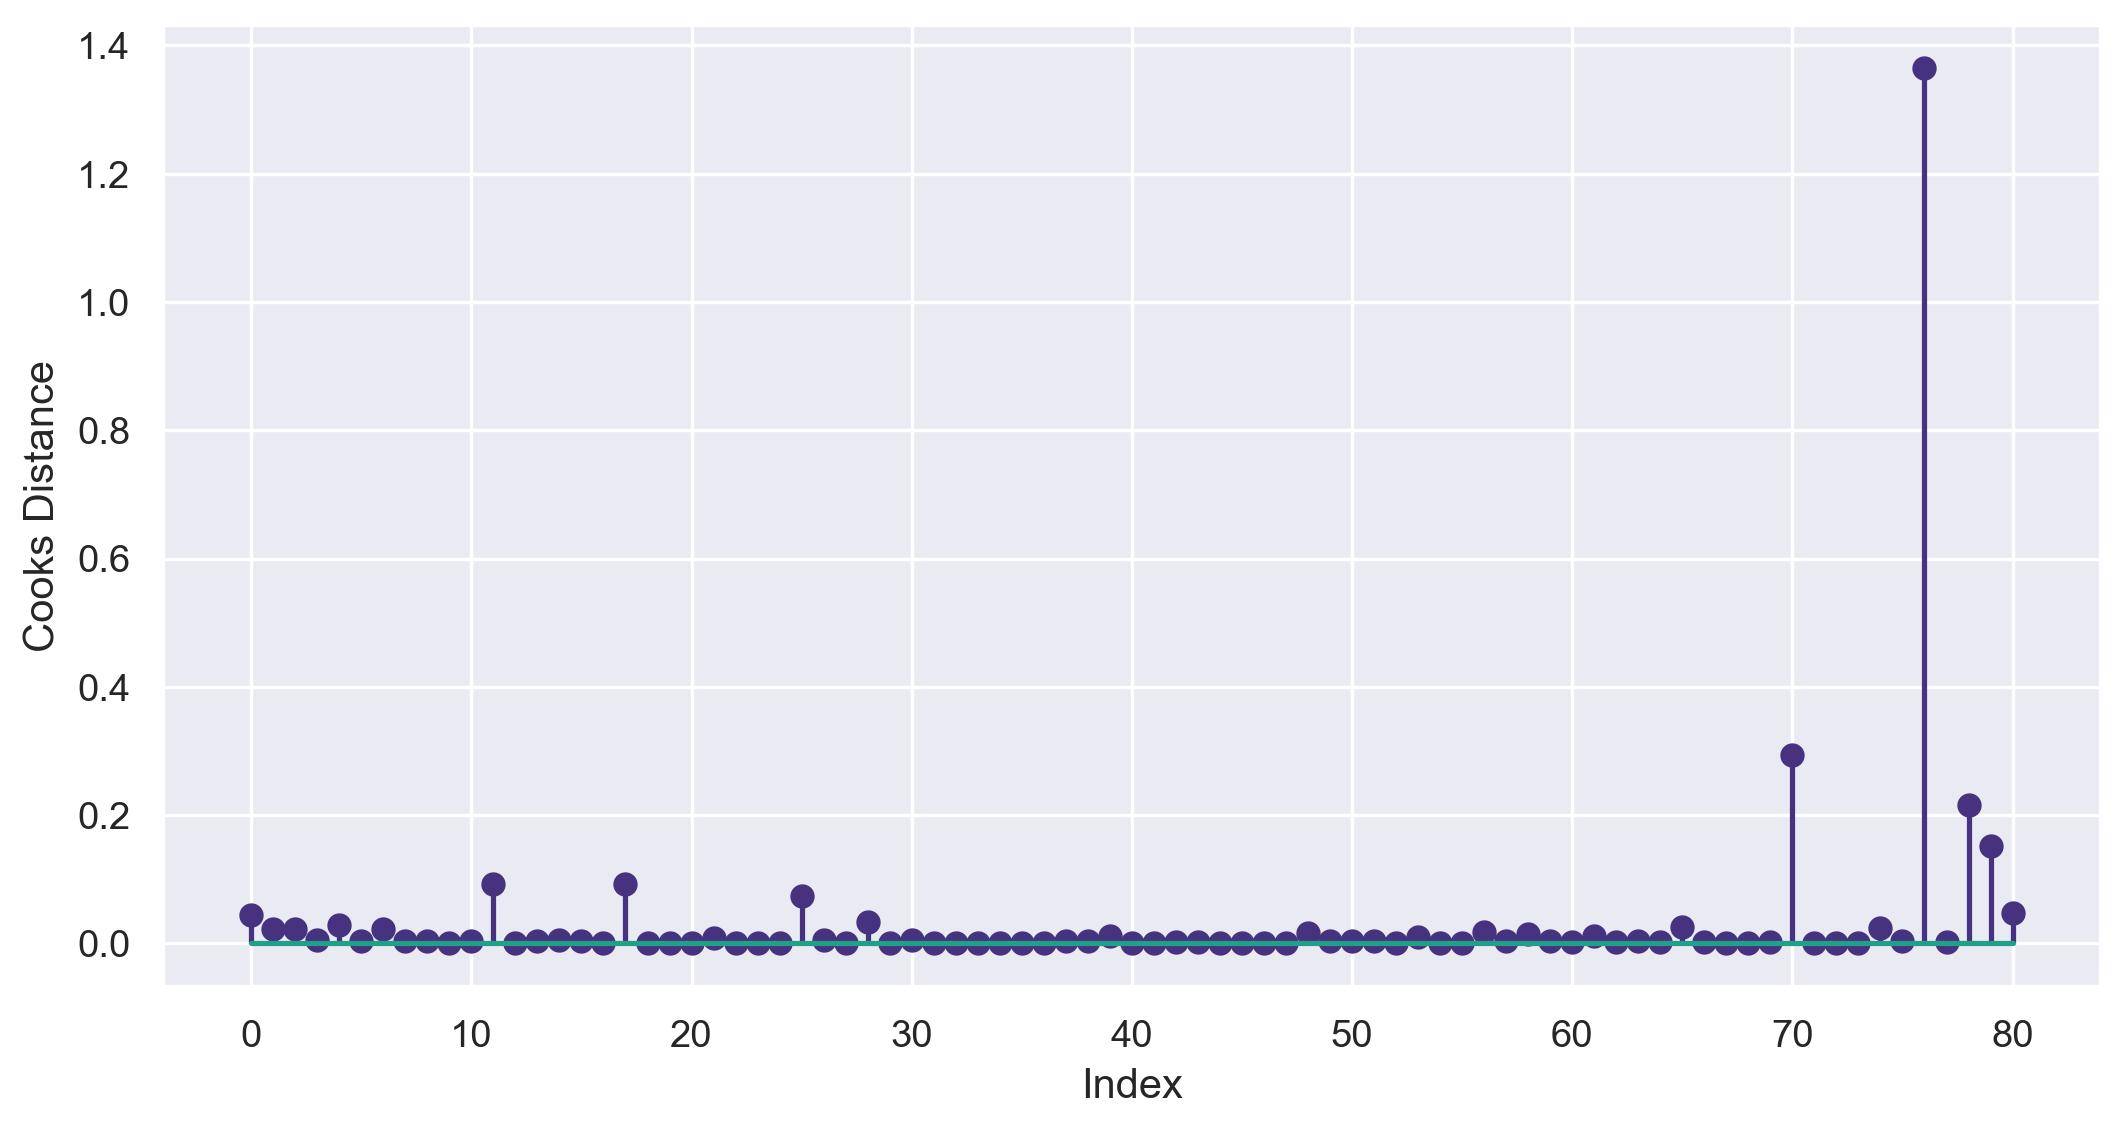

In [54]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [55]:
np.argmax(c), np.max(c)

(76, 1.3641743869103349)

In [56]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [57]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [107]:
df['Cooks distance'] = c
df

,HP,MPG,VOL,SP,WT,Cooks distance
0,49,53.700681,89,104.185353,28.762059,0.044378
1,55,50.013401,92,105.461264,30.466833,0.023144
2,55,50.013401,92,105.461264,30.193597,0.023144
3,70,45.696322,92,113.461264,30.632114,0.005507
4,53,50.504232,92,104.461264,29.889149,0.028403
...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,1.364174
77,238,19.197888,115,150.576579,37.923113,0.001864
78,263,34.000000,50,151.598513,15.769625,0.214968
79,295,19.833733,119,167.944460,39.423099,0.152427


In [109]:
df['Cooks distance'] > 1

0     False
1     False
2     False
3     False
4     False
      ...  
76     True
77    False
78    False
79    False
80    False
Name: Cooks distance, Length: 81, dtype: bool

In [117]:
df[df['Cooks distance'] > 1]   #pandas filtering

,HP,MPG,VOL,SP,WT,Cooks distance
76,322,36.9,50,169.598513,16.132947,1.364174


# Improving the model

In [119]:
df.drop(index=76,inplace=True)

In [121]:
df

,HP,MPG,VOL,SP,WT,Cooks distance
0,49,53.700681,89,104.185353,28.762059,0.044378
1,55,50.013401,92,105.461264,30.466833,0.023144
2,55,50.013401,92,105.461264,30.193597,0.023144
3,70,45.696322,92,113.461264,30.632114,0.005507
4,53,50.504232,92,104.461264,29.889149,0.028403
...,...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219,0.003934
77,238,19.197888,115,150.576579,37.923113,0.001864
78,263,34.000000,50,151.598513,15.769625,0.214968
79,295,19.833733,119,167.944460,39.423099,0.152427


In [123]:
#reset the index

In [125]:
df.reset_index(inplace=True)

In [127]:
df

,index,HP,MPG,VOL,SP,WT,Cooks distance
0,0,49,53.700681,89,104.185353,28.762059,0.044378
1,1,55,50.013401,92,105.461264,30.466833,0.023144
2,2,55,50.013401,92,105.461264,30.193597,0.023144
3,3,70,45.696322,92,113.461264,30.632114,0.005507
4,4,53,50.504232,92,104.461264,29.889149,0.028403
...,...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219,0.003934
76,77,238,19.197888,115,150.576579,37.923113,0.001864
77,78,263,34.000000,50,151.598513,15.769625,0.214968
78,79,295,19.833733,119,167.944460,39.423099,0.152427


In [129]:
df.drop(columns=['index'], inplace=True)

In [131]:
df

,HP,MPG,VOL,SP,WT,Cooks distance
0,49,53.700681,89,104.185353,28.762059,0.044378
1,55,50.013401,92,105.461264,30.466833,0.023144
2,55,50.013401,92,105.461264,30.193597,0.023144
3,70,45.696322,92,113.461264,30.632114,0.005507
4,53,50.504232,92,104.461264,29.889149,0.028403
...,...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219,0.003934
76,238,19.197888,115,150.576579,37.923113,0.001864
77,263,34.000000,50,151.598513,15.769625,0.214968
78,295,19.833733,119,167.944460,39.423099,0.152427


In [133]:
model.rsquared

0.770368341321302

In [135]:
final_model = smf.ols('MPG~HP+SP+VOL', data = df).fit()

In [137]:
final_model.rsquared

0.8192122305013384

**Since the value is <1 , we can stop the diagnostic process and finalize the model**

# Predicting for new records

In [141]:
df.head()

,HP,MPG,VOL,SP,WT,Cooks distance
0,49,53.700681,89,104.185353,28.762059,0.044378
1,55,50.013401,92,105.461264,30.466833,0.023144
2,55,50.013401,92,105.461264,30.193597,0.023144
3,70,45.696322,92,113.461264,30.632114,0.005507
4,53,50.504232,92,104.461264,29.889149,0.028403


In [143]:
test = pd.DataFrame({
    'HP' : [56,53.62,95,85,65],
    'VOL' : [92.6,85.63,75,78,65],
    'SP' : [110,112,150,110,200],
})
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150
3,85.00,78.00,110
4,65.00,65.00,200


In [145]:
final_model.params

Intercept    27.755465
HP           -0.226762
SP            0.412363
VOL          -0.172856
dtype: float64

In [147]:
final_model.predict(test)

0    44.410251
1    46.979473
2    55.103295
3    40.357847
4    84.252834
dtype: float64